<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/Hybrid_cec2014_D_30/C_Frannk_F29_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight


In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One


In [ ]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [ ]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [ ]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

fatal: destination path 'Raianars_Routines' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [ ]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

fatal: destination path 'functions_cec2014_data' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [ ]:
function_select = 'F29'
problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [ ]:
dim = problem_size 

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 280MB/s]


In [ ]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [ ]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

# block of functions to F28: it use F17 and F19
f_matrix = "M_17"+"_D"+str(problem_size) + ".txt"
matrix_F17 = load_matrix_data__(f_matrix)

f_matrix = "M_18"+"_D"+str(problem_size) + ".txt"
matrix_F18 = load_matrix_data__(f_matrix)

f_matrix = "M_19"+"_D"+str(problem_size) + ".txt"
matrix_F19 = load_matrix_data__(f_matrix)

f9_modified_schwefel__  = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__
f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__

f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__
f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
#f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__
f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 

def F17_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.3, 0.3, 0.4])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1+n2)]
    idx3 = shuffle[(n1+n2):]
    mz = np.dot(solution - shift_data, matrix)

    return f9_modified_schwefel__(mz[idx1]) + f8_rastrigin__(mz[idx2]) + f1_elliptic__(mz[idx3]) #+ bias

def F18_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.3, 0.3, 0.4])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):]
    mz = np.dot(solution - shift_data, matrix)
    return f2_bent_cigar__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f8_rastrigin__(mz[idx3]) #+ bias 

def F19_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
    problem_size = len(solution)
    p = np.array([0.2, 0.2, 0.3, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1+n2+n3)]
    idx4 = shuffle[n1+n2+n3:]
    mz = np.dot(solution - shift_data, matrix)
    return f7_griewank__(mz[idx1]) + f6_weierstrass__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + f14_expanded_scaffer__(mz[idx4])#+ bias


def F29(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    num_funcs = 3
    problem_size = len(solution)
    xichma = np.array([10, 30, 50])
    lamda = np.array([1, 1, 1])
    bias = np.array([0, 100, 200])

    def __fi__(solution=None, idx=None):
        if idx == 0:
            return F17_hybrid(solution) #F17_hybrid(solution , shift_data , matrix, shuffle)
        elif idx == 1:
            return F18_hybrid(solution )
        else:
            return F19_hybrid(solution)

    weights = np.ones(num_funcs)
    fits = np.ones(num_funcs)
    for i in range(0, num_funcs):
        t1 = lamda[i] * __fi__(solution, i) + bias[i]
        t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
        w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
        weights[i] = w_i
        fits[i] = t1
    sw = sum(weights)
    result = 0.0
    for i in range(0, num_funcs):
        result += (weights[i] / sw) * fits[i]
    return result #+ f_bias


In [ ]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [ ]:
if function_select == 'F29':
  Function = F29

In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [ ]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
Fun = Function
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.3333333333333333
Npar1= 34
Npar2= 22
Npar3= 22
Npar4= 22
Npar= 100


In [ ]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    #Fuma = f1_elliptic__  # Fuma era Fun
    Fuma = Function
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 6.951445957024892 FO= 3593.0351290706735
k= 1 time= 13.45338713725408 FO= 1903.4443056584378
k= 2 time= 19.852721138795218 FO= 8711.664619023855
k= 3 time= 26.220282713572185 FO= 5277.883296125862
k= 4 time= 32.58903435468674 FO= 2145.4076701679232
k= 5 time= 39.20955376625061 FO= 2408.337942238414
k= 6 time= 45.931839815775554 FO= 3265.545947215348
k= 7 time= 52.34012965758642 FO= 5311.478229141745
k= 8 time= 58.75567754507065 FO= 2136.3327577452233
k= 9 time= 65.19444536368052 FO= 10567.396533851963
k= 10 time= 71.58337446053822 FO= 2625.0057366048427
k= 11 time= 77.97144847710928 FO= 2203.040170800976
k= 12 time= 84.3167549053828 FO= 3405.3470038967434
k= 13 time= 91.08257758617401 FO= 4262.667004949795
k= 14 time= 97.46965239048004 FO= 12119.640840829057
k= 15 time= 103.8732365012169 FO= 10366.897054315148
k= 16 time= 110.25521114667256 FO= 4558.39451218692
k= 17 time= 116.59900437990824 FO= 15284.547678323872
k= 18 time= 122.97229240735372 FO= 1658.7737106122277
k= 19 t

In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
pd.set_option('display.max_columns', 30)  
print(df)

     DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0          308.886395     0.988034  0.000227         1.0      2.0  34.0   
1          300.957746     0.962673  0.000453         0.0      0.0  34.0   
2          302.052037     0.966173  0.000680         1.0      2.0  34.0   
3          303.598986     0.971122  0.000907         1.0      2.0  34.0   
4          304.617939     0.974381  0.001133         0.0      0.0  34.0   
..                ...          ...       ...         ...      ...   ...   
995        216.864860     0.693685  0.225760         1.0      1.0  34.0   
996        216.891283     0.693770  0.225987         1.0      1.0  34.0   
997        216.885935     0.693753  0.226213         1.0      1.0  34.0   
998        216.885871     0.693753  0.226440         1.0      1.0  34.0   
999        216.885754     0.693752  0.226667         1.0      1.0  34.0   

           Fo           CRo          fmin          fmax  AD_fmin  AD_fmax  \
0    0.500000  5.00000

Text(0, 0.5, 'CR')

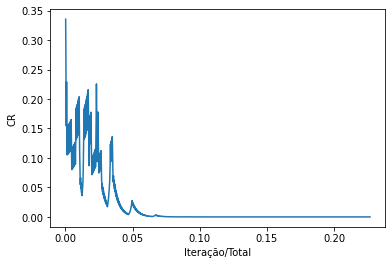

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

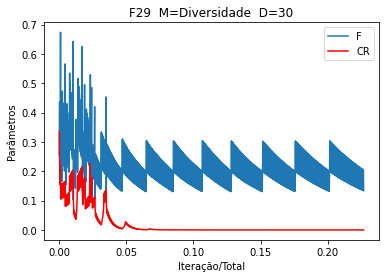

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F29_Diversidade_D=30')

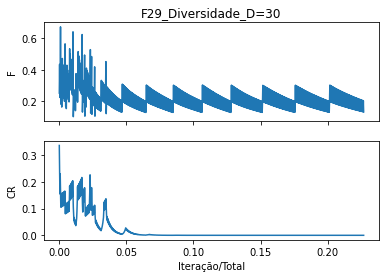

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F29
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  5440.086726752948 STD __: 5763.923988585333
MIN __: 1325.9630513221628 MAX__:  33428.59969083886
5440.086726752948
5763.923988585333
1325.9630513221628
Tempo Médio= 389.574 segundos ---
50 Rodadas

BEST:  [ -53.70123763  -85.12016246  -63.06646967   10.72505505   14.86112897
   19.56744597   12.25059994   47.51512303   44.82323685  -19.77176088
    1.83875119  -58.88410072   19.82524374   78.78035911  100.
   39.32561851  -80.91943014   59.03079656   -9.83814593  -28.01105916
   72.87066802   73.37820933   47.65960497   36.79526929  100.
  -67.8951824   -78.14443581   69.81273925  -13.19745427  100.
 1325.96305132]
